# Python for Time Series

## Introduction to Statsmodels

- Statsmodels is a Python module that provides classes & functions for the estimation of many different statistical models, as well as for conducting statistical tests and statistical data exploration.

### Trends

- Time Series 는 어떠한 형태이건 Trends 를 가짐
1. Upward
2. Horizontal/Stationary
3. Downward

### Seasonality - Repeating Trends

### Cyclical - Trends with no set repetition

- 주기(기간)가 분명하다면 Seasonality, 주기(기간)가 분명하지 않다면 Cyclical

### Hodric-Prescott Filter

- The Hodric-Prescott Filter separates a time-series $Y_t$ into a trend component $\tau_t$ and a cyclical component $C_t$
- $Y_t = \tau_t + C_t$

- The components are determined by minimizing the following quadratic loss, where $\lambda$ is a smoothing parameter (평활화 파라미터)
- The $\lambda$ value above handles variations in the growth rate of the trend component.
- the default $\lambda$ value
  1. quarterly data : 1600
  2. annual data : 6.25
  3. monthly data : 129,600
- $min_{\tau_t}\sum_{t=1}^{T}c_t^2 + \lambda\sum_{t=1}^{T}[(\tau_t - \tau_{t-1}) - (\tau_{t-1} - \tau_{t-2})]^2$

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('./macrodata.csv', index_col=0, parse_dates=True)

In [3]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


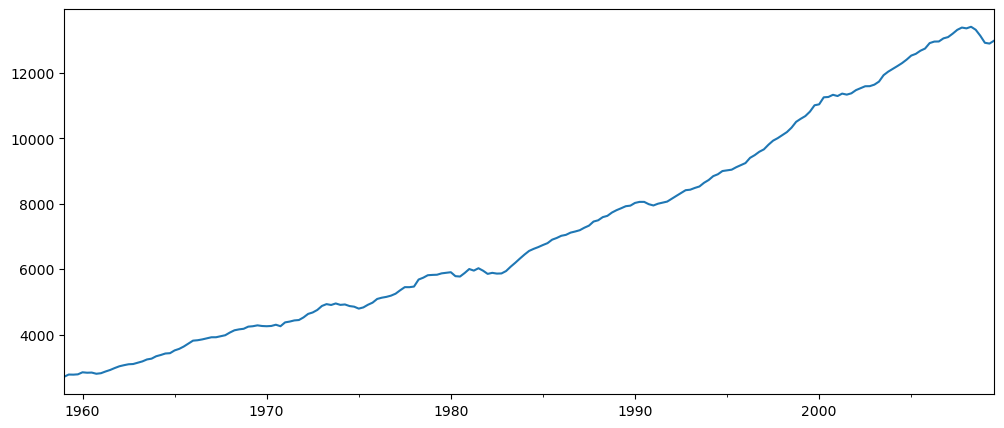

In [4]:
df['realgdp'].plot(figsize=(12,5));

In [5]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [6]:
hpfilter(df['realgdp'], lamb=1600)

(1959-03-31     39.511915
 1959-06-30     80.088532
 1959-09-30     48.875455
 1959-12-31     30.591933
 1960-03-31     64.882667
                  ...    
 2008-09-30    102.018455
 2008-12-31   -107.269472
 2009-03-31   -349.047706
 2009-06-30   -397.557073
 2009-09-30   -333.115243
 Name: realgdp_cycle, Length: 203, dtype: float64,
 1959-03-31     2670.837085
 1959-06-30     2698.712468
 1959-09-30     2726.612545
 1959-12-31     2754.612067
 1960-03-31     2782.816333
                   ...     
 2008-09-30    13222.581545
 2008-12-31    13249.189472
 2009-03-31    13274.457706
 2009-06-30    13299.061073
 2009-09-30    13323.456243
 Name: realgdp_trend, Length: 203, dtype: float64)

In [7]:
gdp_cycle, gdp_trend = hpfilter(df['realgdp'], lamb=1600)

In [8]:
type(gdp_trend)

pandas.core.series.Series

<Axes: >

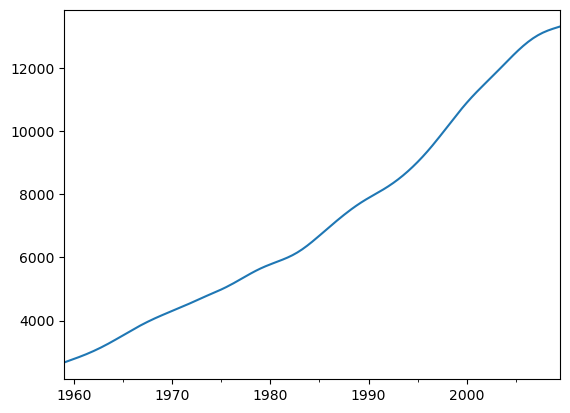

In [9]:
gdp_trend.plot()

In [10]:
df['trend'] = gdp_trend

In [11]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,trend
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00,2670.837085
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74,2698.712468
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09,2726.612545
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06,2754.612067
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19,2782.816333


<Axes: >

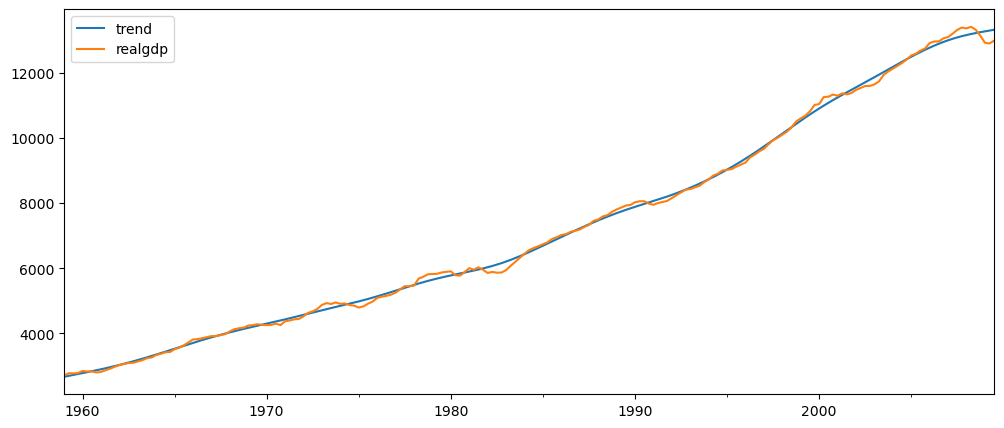

In [12]:
df[['trend', 'realgdp']].plot(figsize=(12,5))

<Axes: >

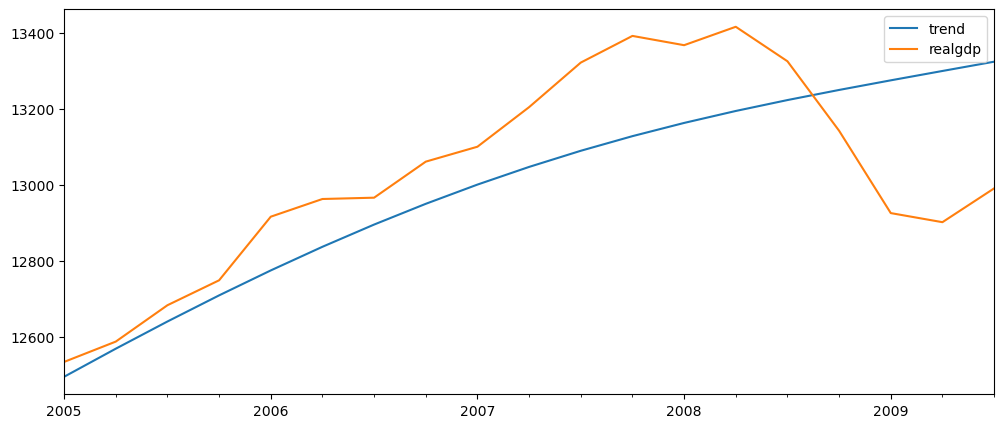

In [13]:
df[['trend', 'realgdp']]['2005-01-01':].plot(figsize=(12,5))

## ETS Decomposition

### ETS Models (Error-Trend-Seasonality)

- Exponential Smoothing
- Trend Methods Models
- ETS Decomposition
- ETS Model 은 다양한 모델을 포함하는 것으로 ETS 분해(Decomposition)는 그 모델 중 하나임

- Statsmodels provides a seasonal decomposition tool we can use to separate out the different components
- ETS Models will take each of those terms for "smoothing" and may add them, multiply them, or even just leave some of them out
- Based off these key factors, we can try to create a model to fit our data

### Time Series Decomposition with ETS (Error-Trend-Seasonality)

- Visualizing the data based off its ETS is a good way to build an understanding of its behavior
- 4개의 plot 제공
  1. Observed : 원계열 데이터
  2. Trend : 추세(Upward, Downward, Stationary)
  3. Seasonal : 반복 주기
  4. Residual = Error, White Noise

- We apply an <b>additive model</b> when it seems that the <u>tread is more linear and the seasonality and trend components seem to be constant over time</u> (e.g. every year add 10,000 passengers)
- A <b>multiplicative model</b> is more appropriate when we are <u>increasing (or decreasing) at a non-linear rate</u> (e.g. each year we double the amount of passenger)

In [14]:
import numpy as np
import pandas as pd
%matplotlib inline

In [15]:
airline = pd.read_csv('./airline_passengers.csv', index_col='Month', parse_dates=True)

In [16]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [17]:
airline.isna().sum()

Thousands of Passengers    0
dtype: int64

In [18]:
airline = airline.dropna()

In [19]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


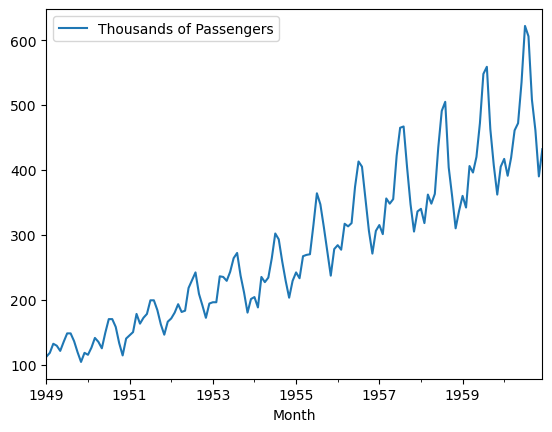

In [20]:
airline.plot();

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [22]:
result = seasonal_decompose(airline['Thousands of Passengers'], 
                            model='multiplicative')

In [23]:
result.seasonal

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
                ...   
1960-08-01    1.219911
1960-09-01    1.060492
1960-10-01    0.921757
1960-11-01    0.801178
1960-12-01    0.898824
Name: seasonal, Length: 144, dtype: float64

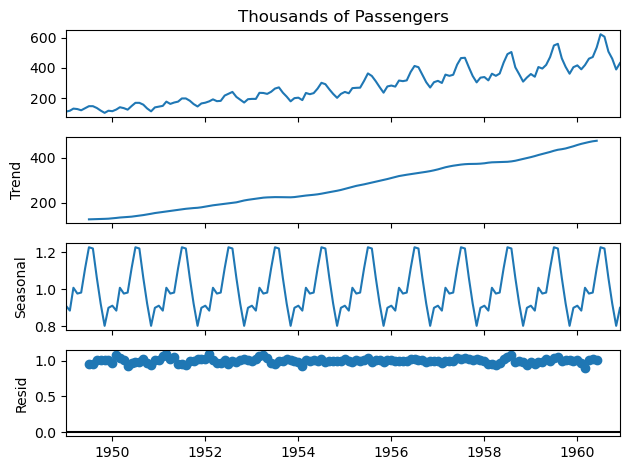

In [24]:
result.plot();

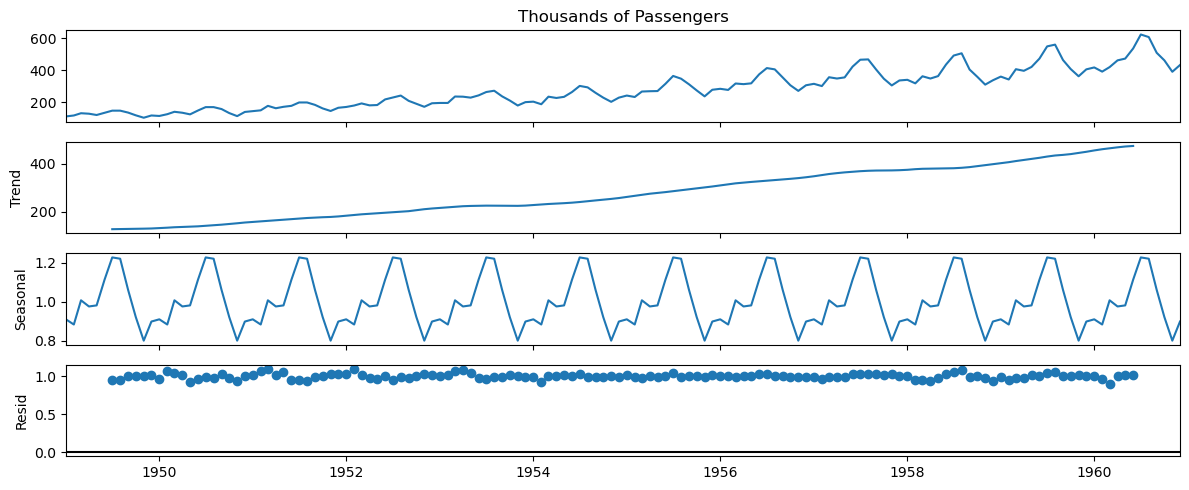

In [25]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 5

result.plot();

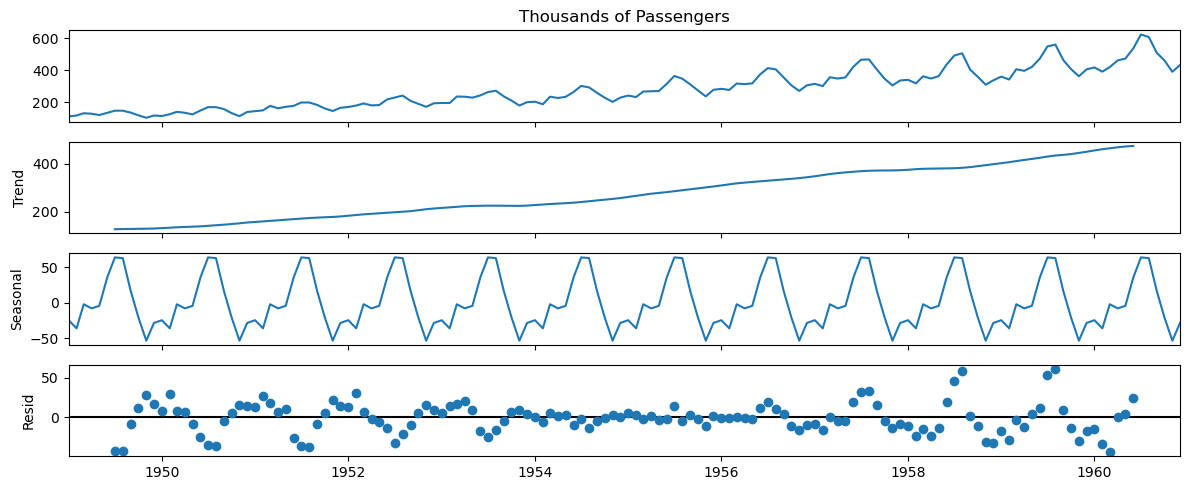

In [26]:
seasonal_decompose(airline['Thousands of Passengers'], 
                   model='additive').plot();

## Moving Averages

### SMA Model

- SMA : Simple Moving Averages (단순 이동 평균)
- We could theoretically attempt to use these simple moving averages to build a generalized model for the real world time series we're analyzing

### EWMA Models

- We could expand off the idea of an SMA (Simple Moving Averages) by utilizing a <b>EWMA (Exponentially Weighted Moving Averages)</b>
- As issue with SMA is that the entire model will be constrained to the same window size
- 전체 모델이 같은 이동 평균 기간(예. 6개월, 12개월)으로 제한된다는 의미로 데이터셋의 길이가 6개월이나 12개월보다 휠신 길더라도 (예. 10년, 20년) 데이터넷 전체에 똑같이 적용됨
- 즉, 데이터셋 기간에 관계없이 1개의 이동 평균 기간만이 적용됨
- It would be nice if we could have more recent data be <b>weighted</b> more than older data
- EWMA will allow us to reduce the lag effect from SMA and it will put more weight on values that occurred more recently (by applying more weight to the more recent values, thus the name)
- The amount of weighted applied to the most recent values will depend on the actual parameters used in the EWMA and the number of periods given a window size

- Basic SMA have some "weaknesses"
  * Smaller windows will lead to more noise, rather that signal
  * It will always lag by the size of the window : 이동 평균 기간만큼 시차 발생
  * It will never reach to full peak or valley of the date due to the averaging : 이동 평균값이 데이터의 극대값 또는 극소값에 이르지 못 함
  * Does not really inform you about possible future behavior, all it really does it describe trends in your data : 미래 변동에 대해 어떠한 정보도 가지고 있지 않음
  * Exteme historical values can skew your SMA significantly : 이동 평균 기간에 따라 이동평균값이 왜곡되는 현상 발생
- To help fix some of these issues, we can use an EWMA

### SMA Lab

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
airline = pd.read_csv('./airline_passengers.csv', 
                      index_col='Month', 
                      parse_dates=True)

In [29]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [30]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [31]:
airline.dropna(inplace=True)

In [32]:
airline.index = pd.to_datetime(airline.index)

In [33]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [34]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [35]:
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()

In [36]:
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

In [37]:
airline.tail()

,Thousands of Passengers,6-month-SMA,12-month-SMA
Month,,,
1960-08-01,606,519.166667,463.333333
1960-09-01,508,534.000000,467.083333
1960-10-01,461,534.000000,471.583333
1960-11-01,390,520.333333,473.916667
1960-12-01,432,503.166667,476.166667


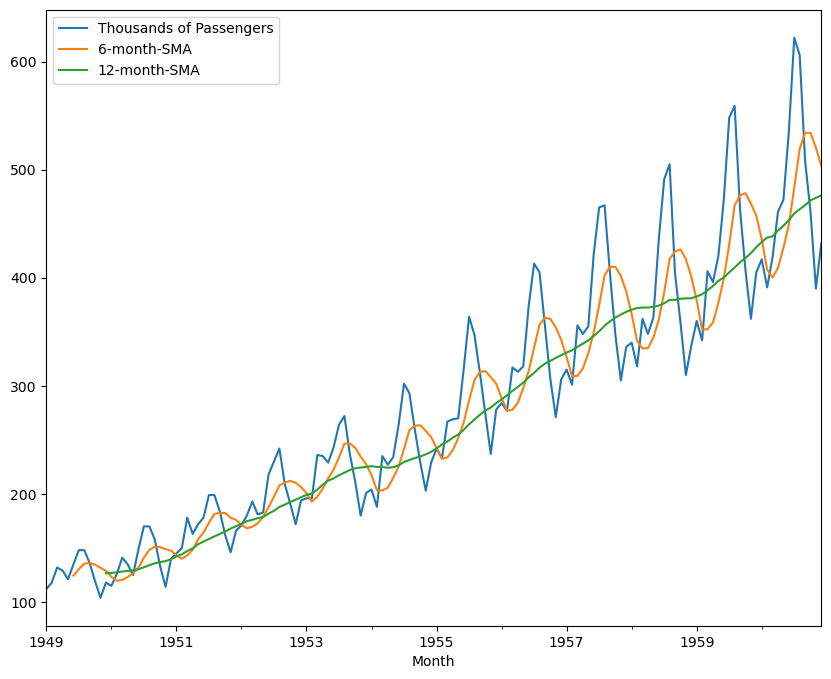

In [38]:
airline.plot(figsize=(10,8));

### EWMA Lab

In [39]:
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

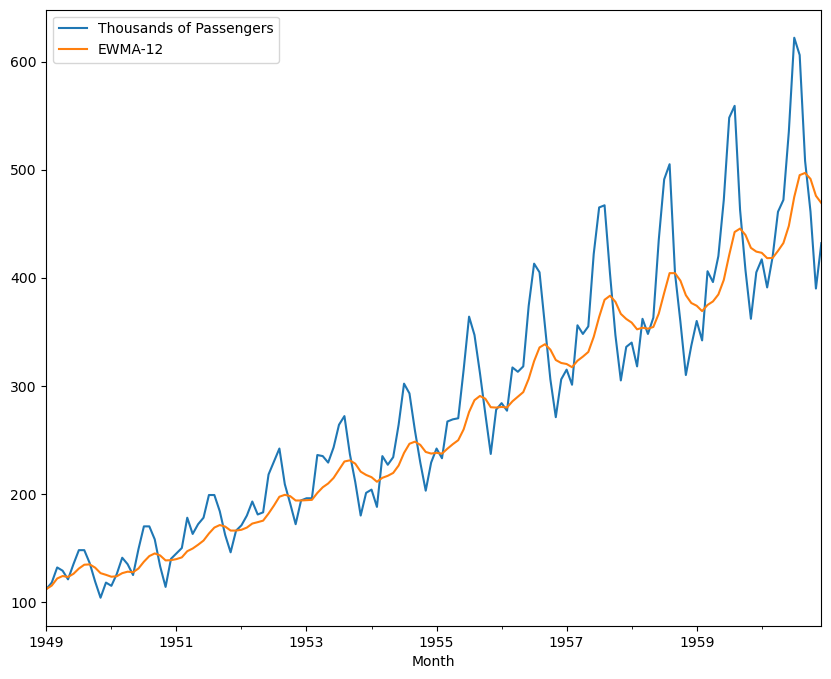

In [40]:
airline[['Thousands of Passengers', 'EWMA-12']].plot(figsize=(10,8));

In [41]:
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

The formular for EWMA is:
$y_t = \frac{\sum_{i=0}^{t}w_ix_{t-i}}{\sum_{i=0}^{t}w_i}$

w 값은 `.ewm()` 의 adjust 매개변수이며, 기본값은 True 임

$y_t = \frac{x_t+(1-\alpha)x_{t-1}+(1-\alpha)^2x_{t-2}+...+(1-\alpha)^tx_{0}}{1+(1-\alpha)+(1-\alpha)^2+...+(1-\alpha)^t}$

When `adjust=False` is specified, moving averages are calculated as:
- $y_0 = x_0$
- $y_1 = (1-\alpha)y_{t-1} + \alpha x_t$
- which is equivalent to using weights:
- $
    w_i = 
     \begin{cases}
         \alpha(1-\alpha)^i &\text{if i < t}\\
         (1-\alpha)^i & \text{if i = t}
     \end{cases}
  $

if `adjust=True` we have y0=x0 and from the last representation above we have yt=axt+(1-$\alpha$)yt-1, therefore there is an assumption that x0 is not an ordinary value but rather an exponentially weighted moment of the infinite series up to that point.

One must have $0\lt\alpha\le1$, and while since version 1.18.0 it has been possible to pass $\alpha$ directly, it's often easier to think about either the span, center of mass (com) or half-life of an EW moment:

$\alpha =
    \begin{cases}
        \frac{2}{s+1},& \text{for span s }\ge{ 1}\\
        \frac{1}{1+c},& \text{for center of mass c}\ge{ 0}\\
        1 - exp^{\frac{log 0.5}{h}},& \text{for half-life h}\gt{ 0}
    \end{cases}
$

- Span corresponds to what is commonly called an "N-day EW moving average".
- Center of mass has a more physical interpretation and can be thought of in terms of span: c=(s-1)/2
- Half-life is the period of time for the exponential weight to reduce to one half.
- Alpha specifies the sommothing factor directly.

In [42]:
airline['EWMA12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

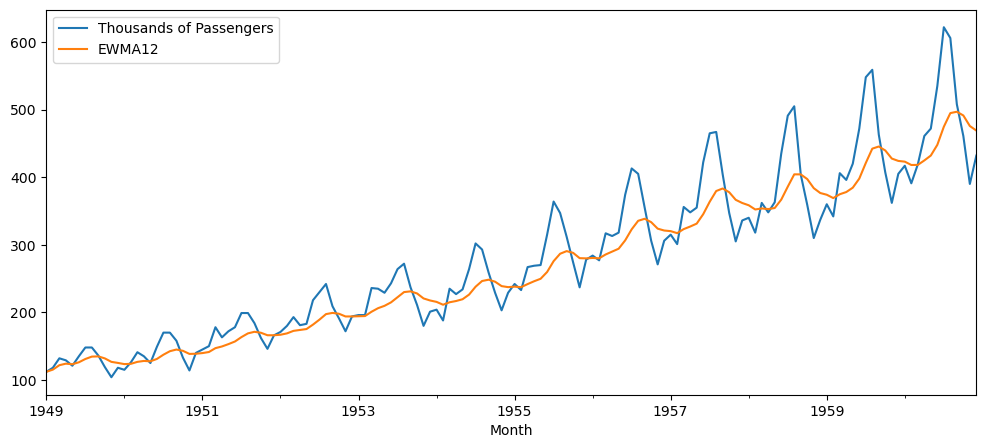

In [43]:
airline[['Thousands of Passengers', 'EWMA12']].plot();

## Holt-Winters Seasonal Methods

- Previously with EWMA we applied Simple Exponential Smoothing using just one smoothing factor $\alpha$
- This failed to account for other contributing factors like trend & seasonality

- Holt (1957) and Winters (1960) extended Hott's method to capture seasonality
- The Holt-Winters Seasonal Method comprise of the forecast equation and three smoothing equations
1. One for the level $ℓ_t$
2. One for the trend $b_t$
3. One for the seasonal component $s_t$
4. with corresonding smoothing parameters $\alpha, \beta, \gamma$
- There are 2 variations to this method that differ in the nature of the seasonal component.
- The <b>"additive method"</b> is preferred when the <u>seasonal variations are roughly constant throught the series</u> (계절정 요소가 전체 데이터에서 일정한 폭으로 나타날 때)
- The <b>"multiplicative method"</b> is preferred when <u>the seasonal variations are changing proportial to the level of the series</u> (계절적 변동폭이 데이터의 수준에 비례해 나타날 떄)
- 주) Additive Model, Multiplicative Model 은 Level 에 대한 것이다???

### Single Exponential Smoothing (단일 지수 평활)
$y_0 = x_0 \\y_t = (1 - \alpha)y_{t-1} + \alpha x_t$

### Double Exponential Smoothing (Holt's Method, 이중 지수 평활)
$l_t = (1 - \alpha)l_{t-1} + \alpha x_t\\
b_t = (1 - \beta)b_{t-1} + \beta (l_t - l_{t-1}) \\
y_t = l_t + b_t \\
\hat y_{t+h} = l_t + hb_t
$
- $l_t$ : Level
- $b_t$ : Trend
- $y_t$ : Fitted Model
- $\hat y_{t+h}$ : Forecasting Model (h = # periods into the future)

### Triple Exponential Smoothing (Holt-Winters Method, 삼중 지수 평활)
$l_t = (1 - \alpha)l_{t-1} + \alpha x_t\\
b_t = (1 - \beta)b_{t-1} + \beta (l_t - l_{t-1}) \\
c_t = (1 - \gamma)c_{t-L} + \gamma (x_t - l_{t-1} - b_{t-1}) \\
y_t = (l_t + b_t)c_t \\
\hat y_{t+m} = (l_t + mb_t)c_{t-L+1+(m-1)modL}
$
- $l_t$ : Level
- $b_t$ : Trend
- $c_t$ : Seasonal
- $y_t$ : Fitted Model
- $\hat y_{t+m}$ : Forecasting Model (m = # periods into the future)
- L represents the number of divisioins per cycle. ex) monthly data that displays a repeating pattern each year, we would use L=12)

In [44]:
import numpy as np
import pandas as pd
%matplotlib inline

In [45]:
df = pd.read_csv('./airline_passengers.csv', index_col='Month', parse_dates=True)

In [46]:
df = df.dropna()

In [47]:
df.index #freq=None 임

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [48]:
df.index.freq = 'MS' # Monthly Start

In [49]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [50]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [51]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [52]:
span = 12
alpha = 2/(span+1)

In [53]:
df['EWMA12'] = df['Thousands of Passengers'].ewm(alpha=alpha, adjust=False).mean()

In [54]:
df.head()

,Thousands of Passengers,EWMA12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


In [55]:
model = SimpleExpSmoothing(df['Thousands of Passengers'])

In [56]:
fitted_model = model.fit(smoothing_level=alpha, optimized=False)

In [57]:
fitted_model.fittedvalues

Month
1949-01-01    112.000000
1949-02-01    112.000000
1949-03-01    112.923077
1949-04-01    115.857988
1949-05-01    117.879836
                 ...    
1960-08-01    474.698368
1960-09-01    494.898619
1960-10-01    496.914216
1960-11-01    491.388952
1960-12-01    475.790652
Freq: MS, Length: 144, dtype: float64

In [58]:
fitted_model.fittedvalues.shift(-1) #EWMA에서의 값과 같음

Month
1949-01-01    112.000000
1949-02-01    112.923077
1949-03-01    115.857988
1949-04-01    117.879836
1949-05-01    118.359861
                 ...    
1960-08-01    494.898619
1960-09-01    496.914216
1960-10-01    491.388952
1960-11-01    475.790652
1960-12-01           NaN
Freq: MS, Length: 144, dtype: float64

In [59]:
df['SES12'] = fitted_model.fittedvalues.shift(-1)

In [60]:
df.head()

,Thousands of Passengers,EWMA12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


In [61]:
# 일반적으로 아래와 같이 한 줄에 표기
df['SES12'] = SimpleExpSmoothing(df['Thousands of Passengers']).fit(smoothing_level=alpha, optimized=False).fittedvalues.shift(-1)

In [62]:
df.head()

,Thousands of Passengers,EWMA12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


In [63]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

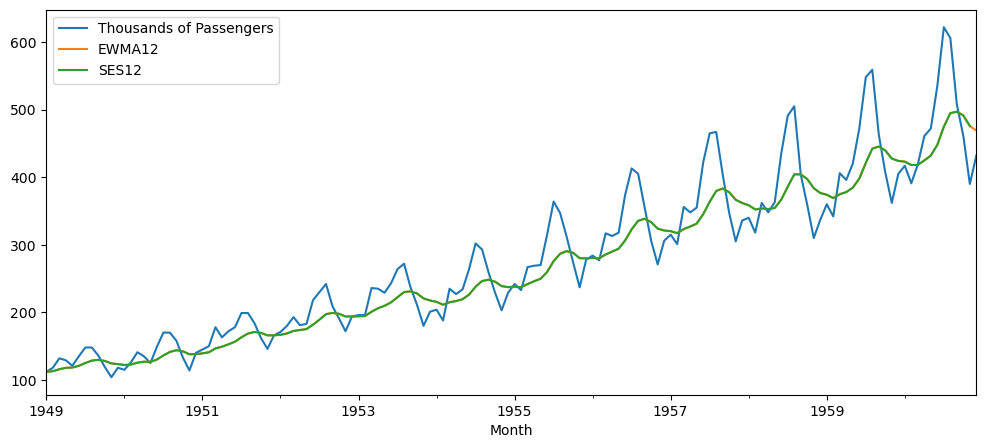

In [64]:
df.plot();

- Time Series Data 가 기울어진 직선 모양의 추세인 경우 -> <b>Additivie Model (덧셈 모형)</b>
- Time Series Data 가 지수적으로 증가(시간이 지날수록 커지거나 작아지는 것)하거나 곡선형 추세인 경우 -> <b>Multiplicative Model (곱셈 모형)</b>
- 주) 두 모형 모두 미래로 가며 증감이 없어지는 추세에서는 값을 과장하는 경향이 있으며 이를 위하여는 감쇠가 필요하기도 함
- 상기 예제 데이터는 추세가 직선인지 지수형인지 불분명하여 덧셈 모형과 곱셈 모형 모두 사용하여도 될 것으로 보임

In [65]:
df['DES_add_12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='add').fit().fittedvalues.shift(-1)

In [66]:
df.head()

,Thousands of Passengers,EWMA12,SES12,DES_add_12
Month,,,,
1949-01-01,112,112.000000,112.000000,114.102394
1949-02-01,118,112.923077,112.923077,120.040657
1949-03-01,132,115.857988,115.857988,134.001539
1949-04-01,129,117.879836,117.879836,131.085845
1949-05-01,121,118.359861,118.359861,123.110263


In [67]:
df.columns

Index(['Thousands of Passengers', 'EWMA12', 'SES12', 'DES_add_12'], dtype='object')

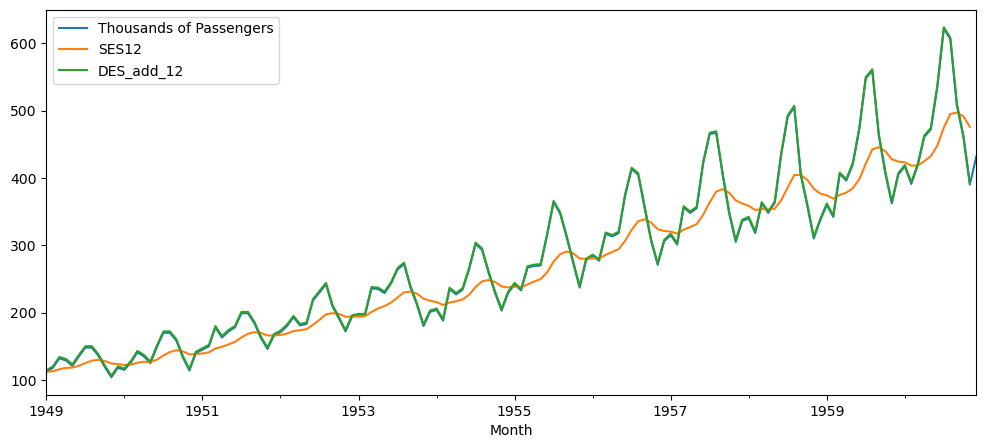

In [68]:
df[['Thousands of Passengers', 'SES12', 'DES_add_12']].plot(figsize=(12,5));
# 천명단위에서 Double Exponential Smoothing (이중 지수 평활, Holt Method)의 값이 실제 값과 거의 유사하게 나옴

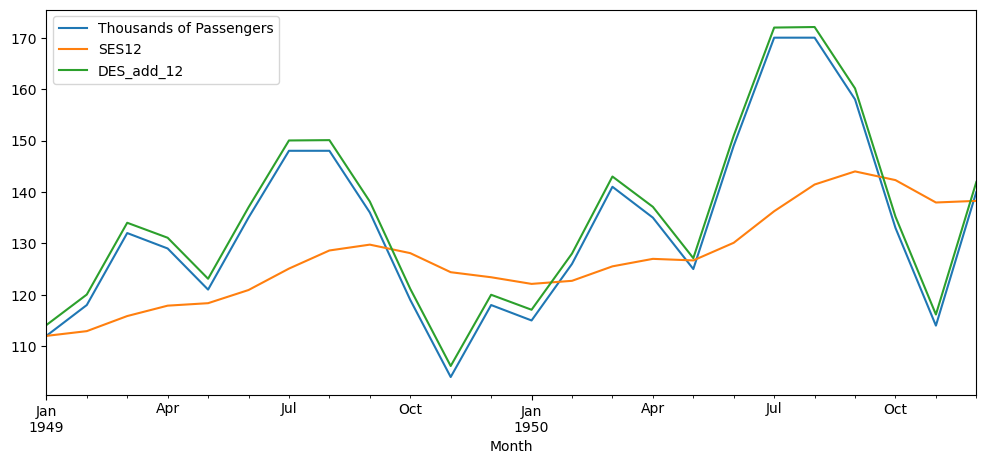

In [69]:
# 앞 2년 것만 보기
df[['Thousands of Passengers', 'SES12', 'DES_add_12']].iloc[:24].plot(figsize=(12,5));

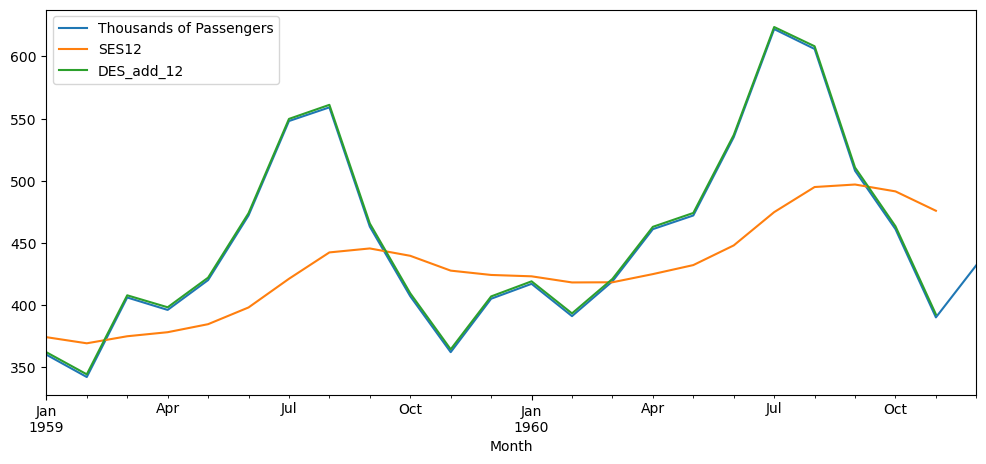

In [70]:
# 뒷 2년 것만 보기
df[['Thousands of Passengers', 'SES12', 'DES_add_12']].iloc[-24:].plot(figsize=(12,5));

In [71]:
df['DES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul').fit().fittedvalues.shift(-1)

In [72]:
df.head()

,Thousands of Passengers,EWMA12,SES12,DES_add_12,DES_mul_12
Month,,,,,
1949-01-01,112,112.000000,112.000000,114.102394,113.990701
1949-02-01,118,112.923077,112.923077,120.040657,120.031669
1949-03-01,132,115.857988,115.857988,134.001539,134.235979
1949-04-01,129,117.879836,117.879836,131.085845,131.270786
1949-05-01,121,118.359861,118.359861,123.110263,123.156267


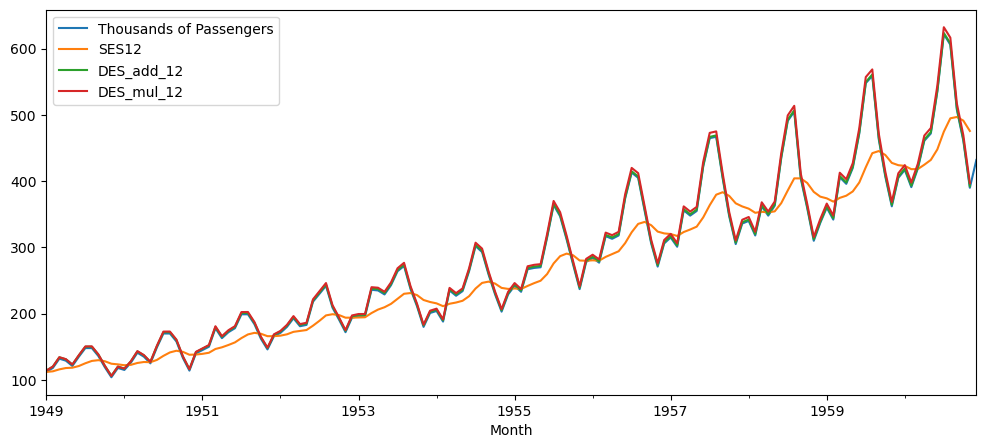

In [73]:
df[['Thousands of Passengers', 'SES12', 'DES_add_12', 'DES_mul_12']].plot(figsize=(12,5));

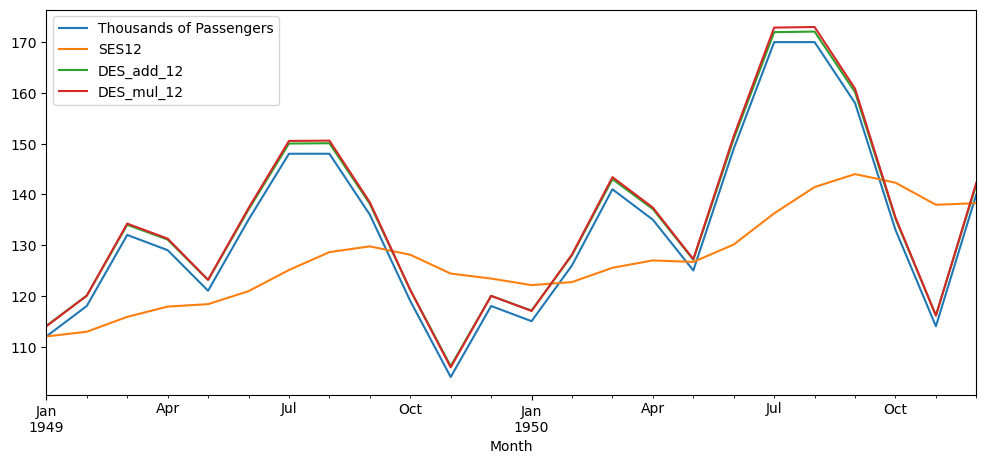

In [74]:
df[['Thousands of Passengers', 'SES12', 'DES_add_12', 'DES_mul_12']].iloc[:24].plot(figsize=(12,5));

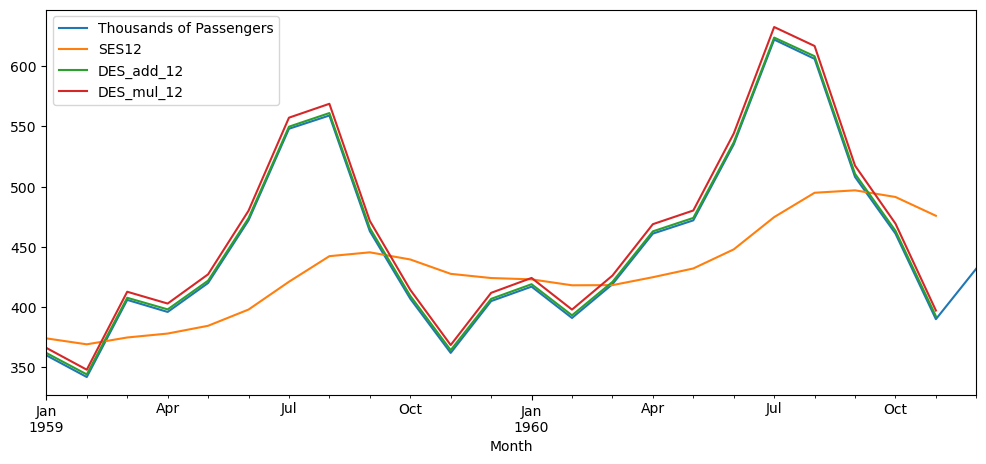

In [75]:
df[['Thousands of Passengers', 'SES12', 'DES_add_12', 'DES_mul_12']].iloc[-24:].plot(figsize=(12,5));

강의에서 강사의 데모에서는 Double Exponential Smoothing 의 Multiplicative Model이 ~24개월 데이터에서 Additive Model 모다 원계열 데이터(Thousands of Passengers)에 대하여 더 잘 맞았으며, 마지막 24개월의 데이터는 동일하였음 -> <b>따라서 이후 예제 코드에서는 Multiplicative Model 을 사용</b>

<font color='red'><b>3중 지수 평활 즉, Holt-Winters Seasonal Model 을 사용하여야 계절성이 반영된다. 이중 지수 평활 (상기 예시)는 추세만이 반영된 것임</b></font>

In [76]:
# trend : add, mul 은 위와 같이 그래프로 판단
# seasonal : add, mul 의 판단은 이후 예시 코드 참조
# 3중 지수 평활은 shift(-1) 필요 없음
df['TES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit().fittedvalues

/Users/rainmaker/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [77]:
df.head()

,Thousands of Passengers,EWMA12,SES12,DES_add_12,DES_mul_12,TES_mul_12
Month,,,,,,
1949-01-01,112,112.000000,112.000000,114.102394,113.990701,111.595648
1949-02-01,118,112.923077,112.923077,120.040657,120.031669,118.842606
1949-03-01,132,115.857988,115.857988,134.001539,134.235979,133.333853
1949-04-01,129,117.879836,117.879836,131.085845,131.270786,127.899963
1949-05-01,121,118.359861,118.359861,123.110263,123.156267,120.979016


In [78]:
df.columns

Index(['Thousands of Passengers', 'EWMA12', 'SES12', 'DES_add_12',
       'DES_mul_12', 'TES_mul_12'],
      dtype='object')

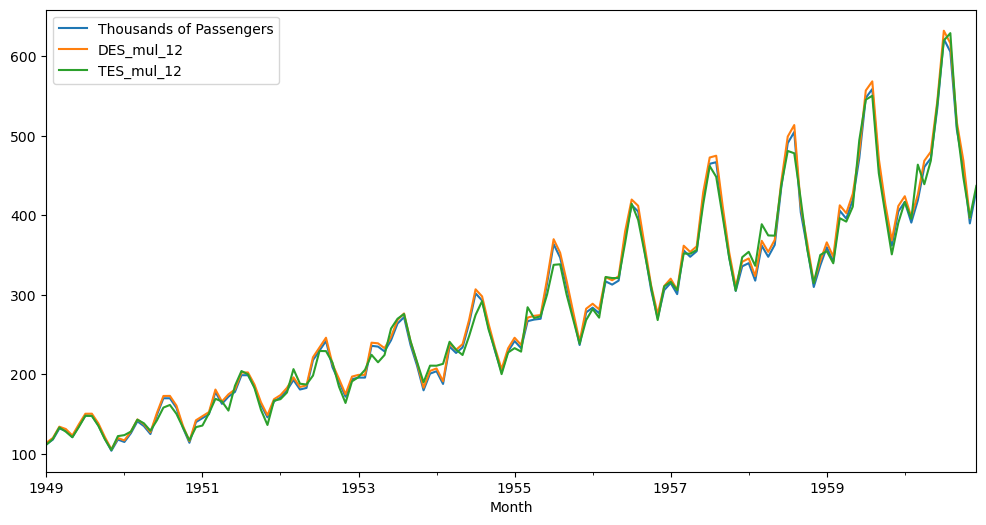

In [79]:
df[['Thousands of Passengers', 'DES_mul_12', 'TES_mul_12']].plot(figsize=(12,6));

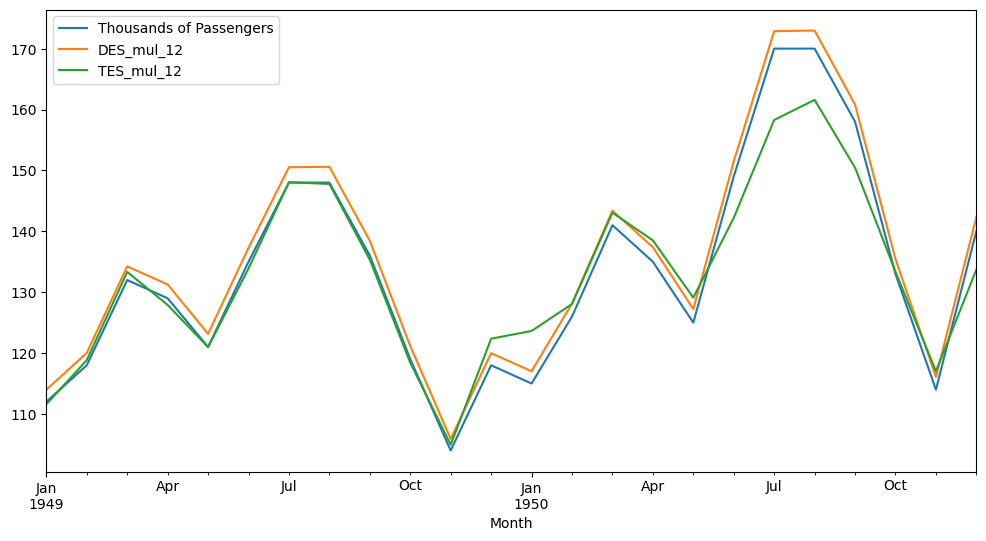

In [80]:
df[['Thousands of Passengers', 'DES_mul_12', 'TES_mul_12']].iloc[:24].plot(figsize=(12,6));

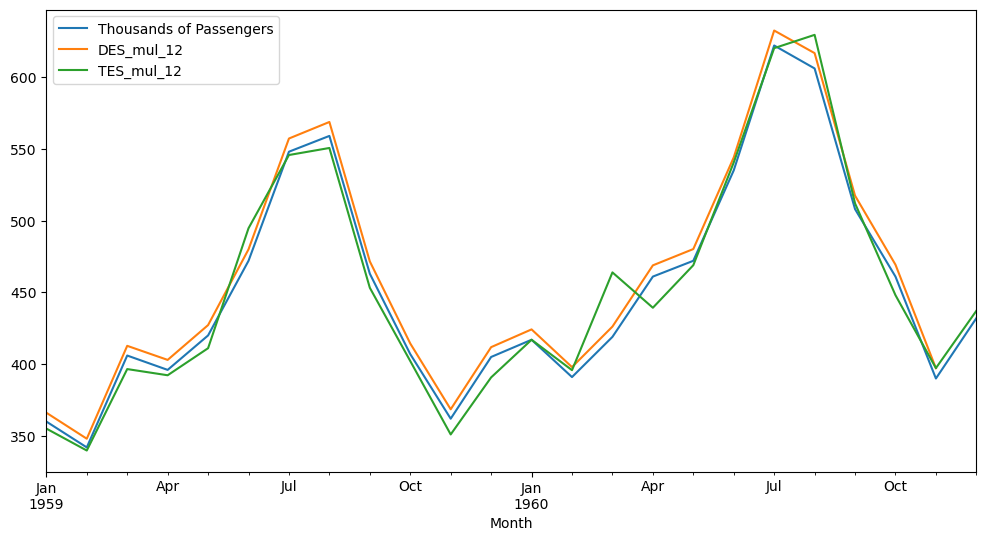

In [81]:
df[['Thousands of Passengers', 'DES_mul_12', 'TES_mul_12']].iloc[-24:].plot(figsize=(12,6));

## Statsmodels Time Series Exercises

- Federal Reserve Economic Database (FRED) 를 통한 실습
- Index for Electricity and Gas Utilities from 1970.01 ~ 1989.12
- https://fred.stlouisfed.org/series/IPG2211A2N

In [82]:
import numpy as np
import pandas as pd
%matplotlib inline

In [83]:
df = pd.read_csv('./EnergyProduction.csv', index_col=0, parse_dates=True)

In [84]:
df.head()

,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321


### 1.Assign a frequence of 'MS' to the DatetimeIndex

In [85]:
df.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq=None)

In [86]:
df.index.freq = 'MS'

In [87]:
df.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq='MS')

### 2.Plot the Dataset

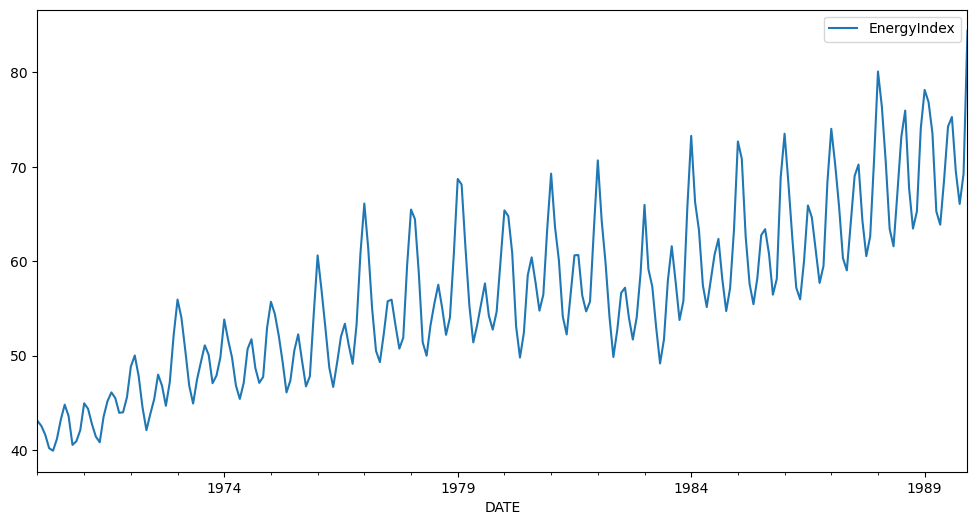

In [88]:
df.plot(figsize=(12,6));

### 3.Add a column that shows a 12-month Simple Moving Averages(SMA) and Plot the result

In [89]:
df['SMA12'] = df['EnergyIndex'].rolling(window=12).mean()

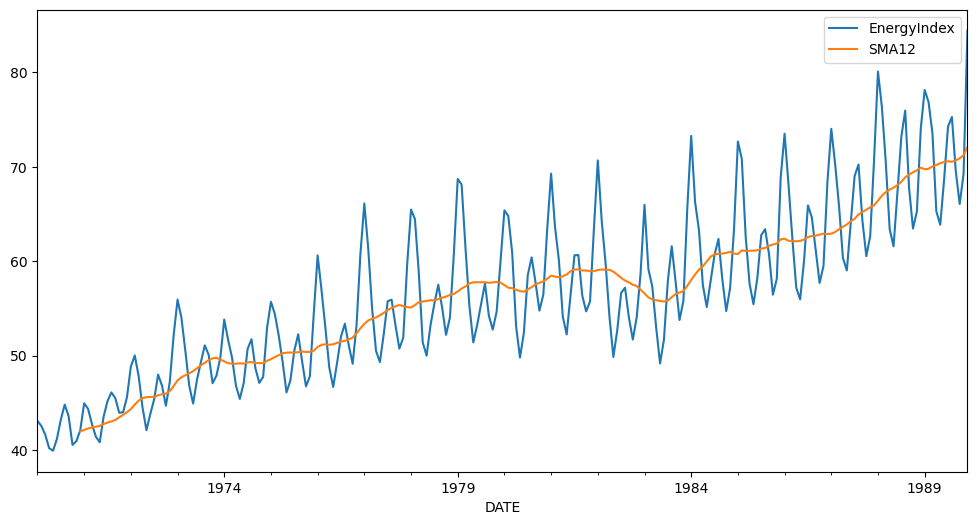

In [90]:
df[['EnergyIndex', 'SMA12']].plot(figsize=(12,6));

### 4.Add a column that shows an Exponentially Weighted Moving Average (EWMA) with a span of 12 using the statsmodels SimpleExpSmoothing function. Plot the result.

In [91]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

In [92]:
df['SES12'] = SimpleExpSmoothing(df['EnergyIndex']).fit(smoothing_level=(2/(12+1)), optimized=False).fittedvalues.shift(-1)

In [93]:
df.columns

Index(['EnergyIndex', 'SMA12', 'SES12'], dtype='object')

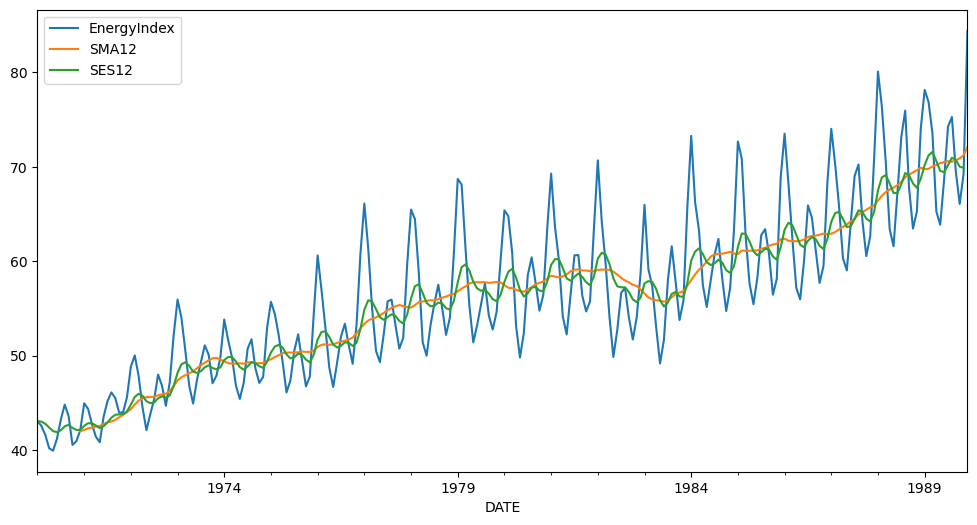

In [94]:
df[['EnergyIndex', 'SMA12', 'SES12']].plot(figsize=(12,6));

### 5.Add a column to the DataFrame that show a Holt-Winters fitted model using Triple Exponential Smoothing with multiplicative models. Plot the result.

In [95]:
df['TESmul12'] = ExponentialSmoothing(df['EnergyIndex'], trend='mul', seasonal='mul', seasonal_periods=12).fit().fittedvalues
# 강사는 이전 강의에서 TES 의 경우 shift(-1) 이 필요없다고 했는데 이번 강좌에서는 shift(-1)을 추가하네...
# df['TESmul12'] = ExponentialSmoothing(df['EnergyIndex'], trend='mul', seasonal='mul', seasonal_periods=12).fit().fittedvalues

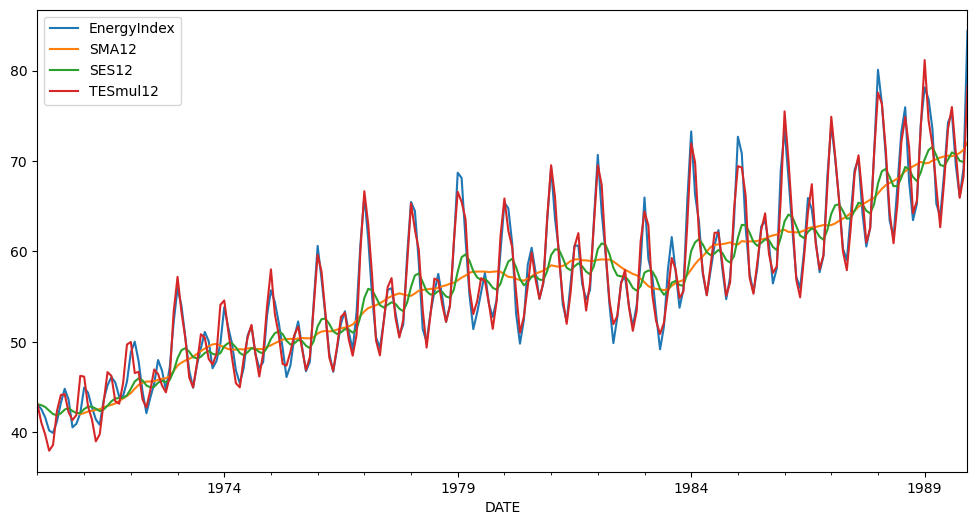

In [96]:
df[['EnergyIndex', 'SMA12', 'SES12', 'TESmul12']].plot(figsize=(12,6));

### OPTIONAL: Plot the same as above, but for only the first two years.

In [97]:
df.head()

,EnergyIndex,SMA12,SES12,TESmul12
DATE,,,,
1970-01-01,43.0869,NaN,43.086900,43.086819
1970-02-01,42.5577,NaN,43.005485,41.068173
1970-03-01,41.6215,NaN,42.792564,39.724769
1970-04-01,40.1982,NaN,42.393431,37.962038
1970-05-01,39.9321,NaN,42.014765,38.600719


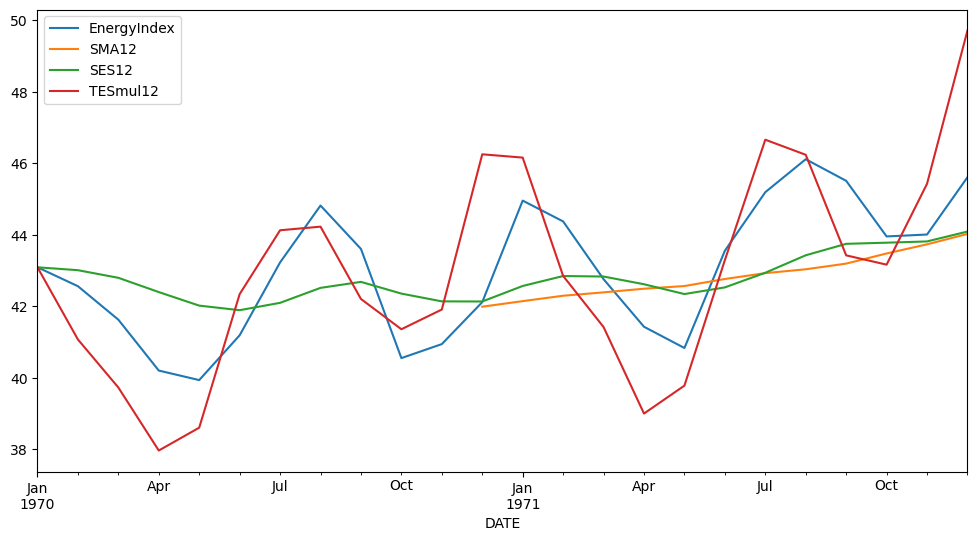

In [98]:
df[['EnergyIndex', 'SMA12', 'SES12', 'TESmul12']].iloc[:24].plot(figsize=(12,6));

### BONUS QUESTION: There is a visible decline in the Industrial Production Index around 1982-1983. Why do you think this might be?

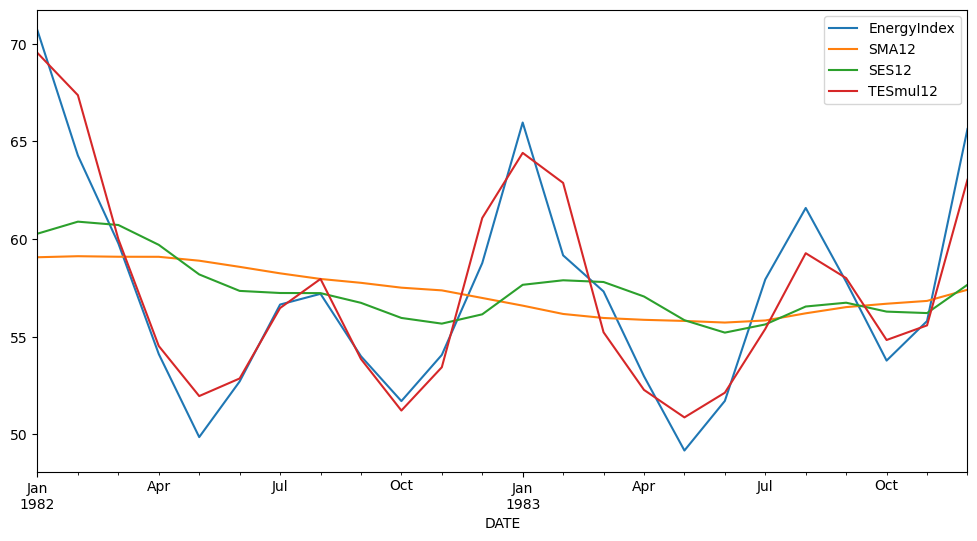

In [99]:
df[['EnergyIndex', 'SMA12', 'SES12', 'TESmul12']].loc['1982':'1983'].plot(figsize=(12,6));